## ASSIGNMENT_2_NEURAL NETWORKS

In [5]:
!pip install tensorflow

**Import the top 10,000 most frequently occurring words from the IMDB dataset for sentiment analysis training and testing.**

In [10]:
from tensorflow.keras.datasets import imdb
(traindata_1, trainlabels_1), (testdata_1, testlabels_1) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
print(traindata_1,traindata_1.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [16]:
trainlabels_1[0]

1

In [18]:
len(trainlabels_1)

25000

In [20]:
testlabels_1[0]

0

In [22]:
max([max(sequence_647) for sequence_647 in testdata_1])

9999

**Using the reverse word index, decode the first review from the training set by translating word indices back to words.**

In [34]:
word_index_647 = imdb.get_word_index()
reverse_word_index_647 = dict(
    [(value, key) for (key, value) in word_index_647.items()])
decode_review = " ".join(
    [reverse_word_index_647.get(i - 3, "?") for i in traindata_1[0]])

**Each integer sequence is transformed into a binary vector of a given dimension, with the index set to 1 if the word appears in the sequence.**

In [36]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [38]:
a_train = vectorize_sequences(traindata_1)
a_test = vectorize_sequences(testdata_1)

In [40]:
a_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [42]:
a_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [44]:
b_train = np.asarray(trainlabels_1).astype("float32")
b_test = np.asarray(testlabels_1).astype("float32")

In [46]:
from tensorflow import keras
from tensorflow.keras import layers

model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [48]:
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [50]:
a_val = a_train[:10000]
partial_a_train = a_train[10000:]
b_val = b_train[:10000]
partial_b_train = b_train[10000:]

In [52]:
## model planned to train with 20 epoch with batch size of 256
history = model647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.6890 - loss: 0.6129 - val_accuracy: 0.8520 - val_loss: 0.4191
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8892 - loss: 0.3550 - val_accuracy: 0.8756 - val_loss: 0.3288
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9140 - loss: 0.2659 - val_accuracy: 0.8858 - val_loss: 0.2901
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9322 - loss: 0.2093 - val_accuracy: 0.8761 - val_loss: 0.3013
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9438 - loss: 0.1726 - val_accuracy: 0.8881 - val_loss: 0.2741
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9557 - loss: 0.1424 - val_accuracy: 0.8870 - val_loss: 0.2806
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9627 - loss: 0.1216 - val_accuracy: 0.8853 - val_loss: 0.2921
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9692 - loss: 0.1044 - val_accuracy: 0.8822 - 

In [54]:
hist_dict647 = history.history
hist_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

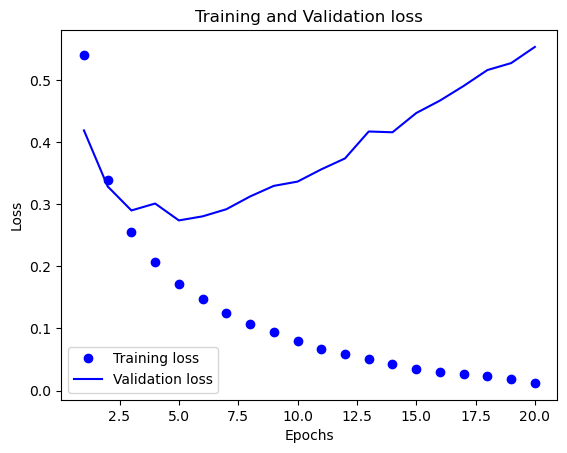

In [56]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plot647
hist_dict647 = history.history
loss_val = hist_dict647["loss"]
val_loss_val = hist_dict647["val_loss"]
epochs = range(1, len(loss_val) + 1)
plot647.plot(epochs, loss_val, "bo", label="Training loss")
plot647.plot(epochs, val_loss_val, "b", label="Validation loss")
plot647.title("Training and Validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

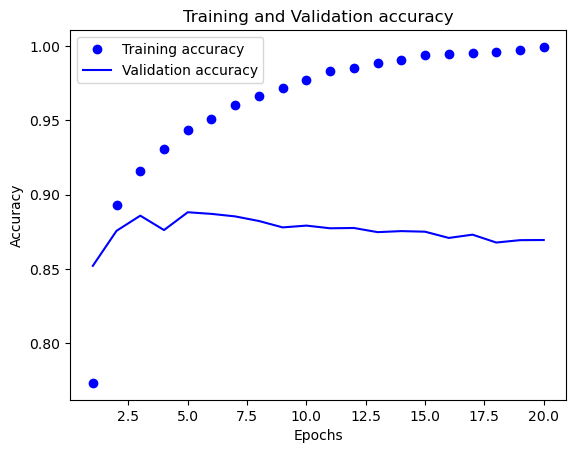

In [58]:
#Plotting training accuracy vs validatition accuracy
plot647.clf()
accuracy = hist_dict647["accuracy"]
val_accuracy = hist_dict647["val_accuracy"]
plot647.plot(epochs, accuracy, "bo", label="Training accuracy")
plot647.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plot647.title("Training and Validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [60]:
model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647.fit(a_train, b_train, epochs=4, batch_size=512)
results = model647.evaluate(a_test, b_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7319 - loss: 0.5594
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8968 - loss: 0.2897
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9258 - loss: 0.2131
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9372 - loss: 0.1788
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8745 - loss: 0.3095


In [62]:
results

[0.3114032447338104, 0.874239981174469]

In [64]:
model647.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.1646639 ],
       [0.9998606 ],
       [0.5157802 ],
       ...,
       [0.09917887],
       [0.05347296],
       [0.46675113]], dtype=float32)

In [66]:
model647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

a_val647 = a_train[:10000]
partial_a_train = a_train[10000:]

b_val647 = b_train[:10000]
partial_b_train = b_train[10000:]


hist_layer647 = model647_layer.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val647, b_val647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.7171 - loss: 0.5705 - val_accuracy: 0.8612 - val_loss: 0.3922
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8949 - loss: 0.3392 - val_accuracy: 0.8751 - val_loss: 0.3311
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9194 - loss: 0.2621 - val_accuracy: 0.8835 - val_loss: 0.2994
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9303 - loss: 0.2165 - val_accuracy: 0.8838 - val_loss: 0.2930
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9429 - loss: 0.1842 - val_accuracy: 0.8884 - val_loss: 0.2793
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9543 - loss: 0.1632 - val_accuracy: 0.8872 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9561 - loss: 0.1487 - val_accuracy: 0.8874 - val_loss: 0.2772
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9636 - loss: 0.1317 - val_accuracy: 0.8853 - 

**Retrieve the model training history from history_layer647 and present the history dictionary's keys.**

In [69]:
hist_dict647 = hist_layer647.history
hist_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

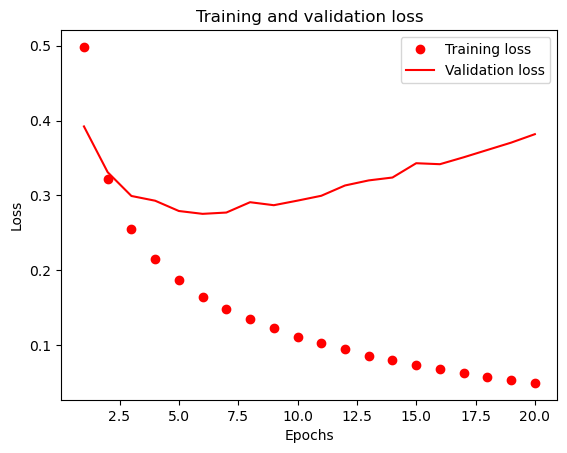

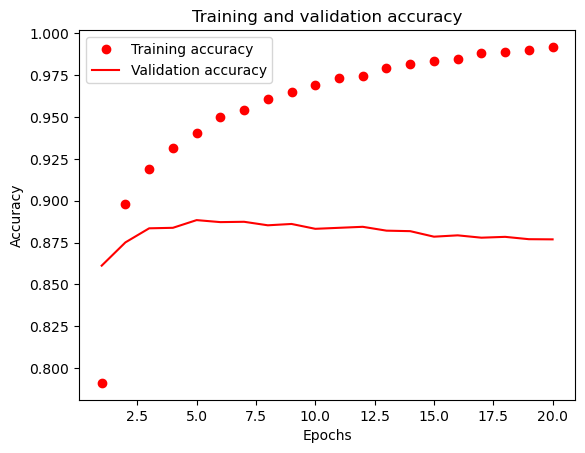

In [71]:
import matplotlib.pyplot as plot647
hist_dict647 = hist_layer647.history
loss_val647 = hist_dict647["loss"]
val_loss_val647 = hist_dict647["val_loss"]
epochs647 = range(1, len(loss_val647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, loss_val647, "ro", label="Training loss")
plot647.plot(epochs647, val_loss_val647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

#Plotting graph of Training and Validation Accuracy
plot647.clf()
acc647 = hist_dict647["accuracy"]
val_acc1 = hist_dict647["val_accuracy"]
plot647.plot(epochs647, acc647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_acc1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [73]:
model647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647_layer.fit(a_train, b_train, epochs=5, batch_size=512)
result647_layer = model647_layer.evaluate(a_test, b_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7420 - loss: 0.5434
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9023 - loss: 0.2990
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9209 - loss: 0.2332
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9336 - loss: 0.1995
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9371 - loss: 0.1808
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8866 - loss: 0.2806


In [76]:
print(result647_layer)

[0.2795116603374481, 0.8875200152397156]


In [78]:
model647_layer.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.2327626 ],
       [0.9993193 ],
       [0.86260647],
       ...,
       [0.11344058],
       [0.09728812],
       [0.55236113]], dtype=float32)

In [80]:
model3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
a_val3_647 = a_train[:10000]
partial_a_train_647 = a_train[10000:]

b_val3_647 = b_train[:10000]
partial_b_train_647 = b_train[10000:]

hist3_layers_647 = model3_layers_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val3_647, b_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.6639 - loss: 0.6271 - val_accuracy: 0.8502 - val_loss: 0.4250
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8880 - loss: 0.3570 - val_accuracy: 0.8719 - val_loss: 0.3303
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9202 - loss: 0.2543 - val_accuracy: 0.8869 - val_loss: 0.2868
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9363 - loss: 0.1962 - val_accuracy: 0.8830 - val_loss: 0.2890
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9506 - loss: 0.1543 - val_accuracy: 0.8889 - val_loss: 0.2806
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9649 - loss: 0.1289 - val_accuracy: 0.8856 - val_loss: 0.2898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9664 - loss: 0.1103 - val_accuracy: 0.8768 - val_loss: 0.3244
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9728 - loss: 0.0937 - val_accuracy: 0.8799 - 

In [82]:
hist_dict_3_647 = hist3_layers_647.history
hist_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

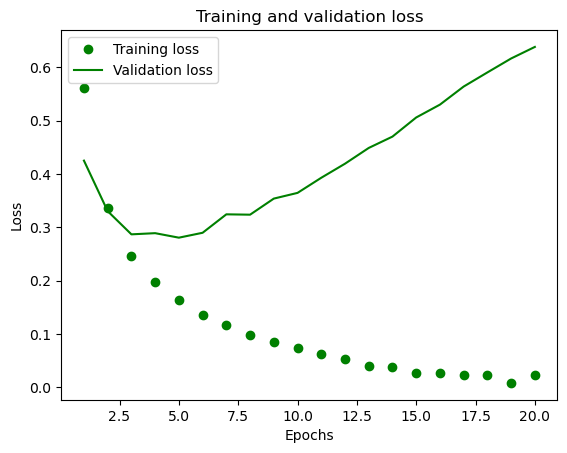

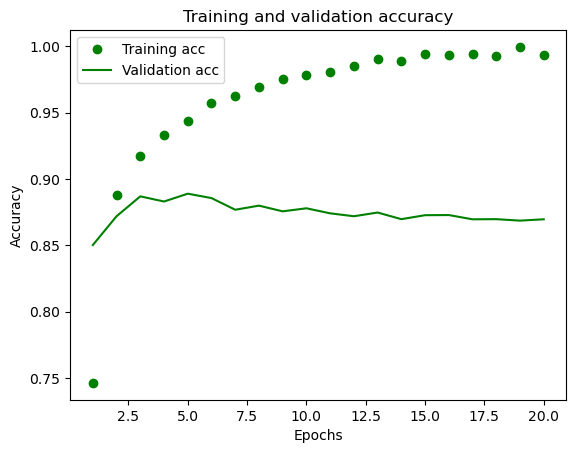

In [84]:
loss_val647 = hist_dict_3_647["loss"]
val_loss_val3 = hist_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc3 = hist_dict_3_647["accuracy"]
val_acc3 = hist_dict_3_647["val_accuracy"]
plot647.plot(epochs3, acc3, "go", label="Training acc")
plot647.plot(epochs3, val_acc3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [86]:
model3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3_layers_647.fit(a_train, b_train, epochs=3, batch_size=512)
results3_layers = model3_layers_647.evaluate(a_test, b_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7128 - loss: 0.5788
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8991 - loss: 0.2854
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9250 - loss: 0.2104
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8719 - loss: 0.3214


In [90]:
print(result647_layer)

[0.2795116603374481, 0.8875200152397156]


In [92]:
model647_layer.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.2327626 ],
       [0.9993193 ],
       [0.86260647],
       ...,
       [0.11344058],
       [0.09728812],
       [0.55236113]], dtype=float32)

In [94]:
model3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
a_val3_647 = a_train[:10000]
partial_a_train_647 = a_train[10000:]

b_val3_647 = b_train[:10000]
partial_b_train_647 = b_train[10000:]

hist_3_layers_647 = model3_layers_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val3_647, b_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6948 - loss: 0.6082 - val_accuracy: 0.8625 - val_loss: 0.3805
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8894 - loss: 0.3257 - val_accuracy: 0.8865 - val_loss: 0.2965
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9252 - loss: 0.2254 - val_accuracy: 0.8746 - val_loss: 0.3069
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9395 - loss: 0.1801 - val_accuracy: 0.8871 - val_loss: 0.2759
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9523 - loss: 0.1403 - val_accuracy: 0.8824 - val_loss: 0.3014
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9654 - loss: 0.1163 - val_accuracy: 0.8736 - val_loss: 0.3311
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9736 - loss: 0.0919 - val_accuracy: 0.8785 - val_loss: 0.3270
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9778 - loss: 0.0764 - val_accuracy: 0.8802 - 

In [96]:
hist_dict_3_647 = hist_3_layers_647.history
hist_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

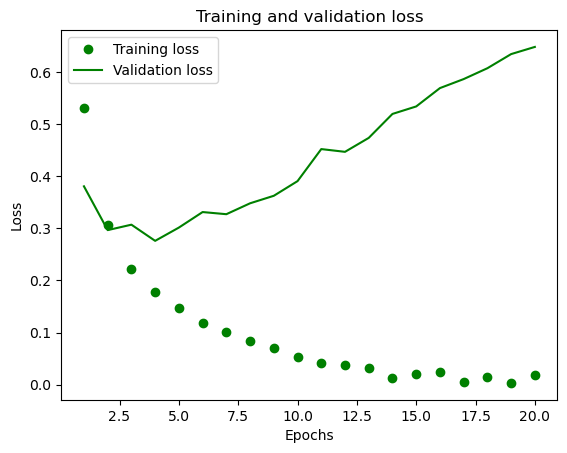

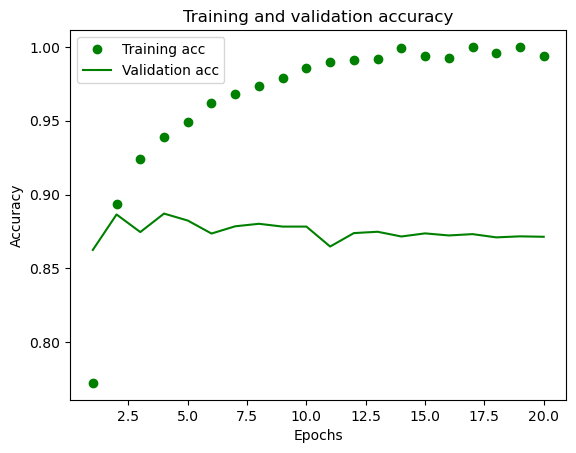

In [98]:
loss_val647 = hist_dict_3_647["loss"]
val_loss_val3 = hist_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc3 = hist_dict_3_647["accuracy"]
val_acc3 = hist_dict_3_647["val_accuracy"]
plot647.plot(epochs3, acc3, "go", label="Training acc")
plot647.plot(epochs3, val_acc3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [100]:
model3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3_layers_647.fit(a_train, b_train, epochs=3, batch_size=512)
results3_layers = model3_layers_647.evaluate(a_test, b_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7229 - loss: 0.5590
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8972 - loss: 0.2869
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9231 - loss: 0.2135
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8854 - loss: 0.2825


In [102]:
print(results3_layers)

[0.2811872959136963, 0.8870400190353394]


In [104]:
model3_layers_647.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.20899348],
       [0.9980191 ],
       [0.9386592 ],
       ...,
       [0.10745914],
       [0.08170866],
       [0.5094844 ]], dtype=float32)

In [106]:
model32_units_647 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model32_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
a_val_32_647 = a_train[:10000]
partial_a_train = a_train[10000:]

b_val_32_647 = b_train[:10000]
partial_b_train = b_train[10000:]


hist32_units_647 = model32_units_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_32_647, b_val_32_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6699 - loss: 0.6048 - val_accuracy: 0.8717 - val_loss: 0.3532
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8914 - loss: 0.3015 - val_accuracy: 0.8891 - val_loss: 0.2882
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9199 - loss: 0.2237 - val_accuracy: 0.8831 - val_loss: 0.2905
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9422 - loss: 0.1634 - val_accuracy: 0.8753 - val_loss: 0.3176
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9467 - loss: 0.1494 - val_accuracy: 0.8868 - val_loss: 0.2969
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9628 - loss: 0.1103 - val_accuracy: 0.8663 - val_loss: 0.3610
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9709 - loss: 0.0919 - val_accuracy: 0.8655 - val_loss: 0.3918
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9752 - loss: 0.0792 - val_accuracy: 0.8814 - v

In [108]:
hist_dict_32_647 = hist32_units_647.history
hist_dict_32_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

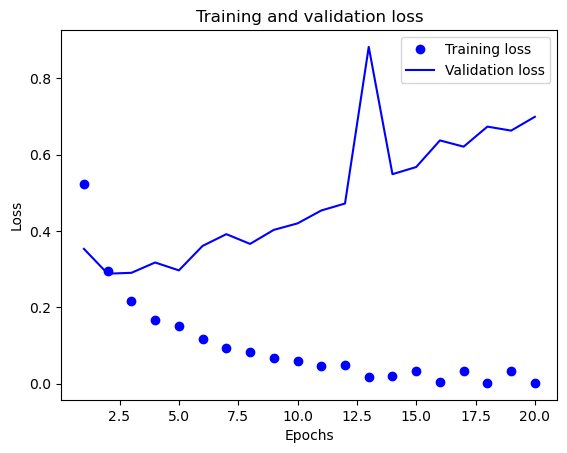

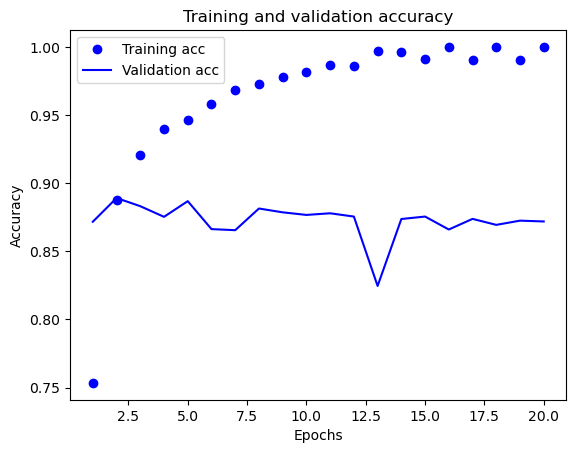

In [110]:
loss_val32_647 = hist_dict_32_647["loss"]
val_loss_val32_647 = hist_dict_32_647["val_loss"]
epochs_32 = range(1, len(loss_val32_647) + 1)
plot647.plot(epochs_32, loss_val32_647, "bo", label="Training loss")
plot647.plot(epochs_32, val_loss_val32_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_32 = hist_dict_32_647["accuracy"]
val_acc32 = hist_dict_32_647["val_accuracy"]
plot647.plot(epochs_32, acc_32, "bo", label="Training acc")
plot647.plot(epochs_32, val_acc32, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [112]:
hist32_units_647 = model32_units_647.fit(a_train, b_train, epochs=3, batch_size=512)
results32_units_647 = model32_units_647.evaluate(a_test, b_test)
results32_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9393 - loss: 0.2438
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9667 - loss: 0.1069
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9780 - loss: 0.0721
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8642 - loss: 0.4413


[0.4362654685974121, 0.866599977016449]

In [114]:
model64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
a_val_64_2 = a_train[:10000]
partial_a_train_64_2 = a_train[10000:]

b_val_64_2 = b_train[:10000]
partial_b_train_64_2 = b_train[10000:]

hist_64_647 = model64_units_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_64_2, b_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6703 - loss: 0.5916 - val_accuracy: 0.8596 - val_loss: 0.3573
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8844 - loss: 0.3085 - val_accuracy: 0.8885 - val_loss: 0.2855
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9235 - loss: 0.2225 - val_accuracy: 0.8845 - val_loss: 0.2871
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9415 - loss: 0.1694 - val_accuracy: 0.8878 - val_loss: 0.2776
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9500 - loss: 0.1439 - val_accuracy: 0.8859 - val_loss: 0.2830
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9683 - loss: 0.1040 - val_accuracy: 0.8728 - val_loss: 0.3485
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9644 - loss: 0.1045 - val_accuracy: 0.8784 - val_loss: 0.3254
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9740 - loss: 0.0817 - val_accuracy: 0.8828 - v

In [118]:
hist_dict_64_647 = hist_64_647.history
hist_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [120]:
model64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
a_val_64_2 = a_train[:10000]
partial_a_train_64_2 = a_train[10000:]

b_val_64_2 = b_train[:10000]
partial_b_train_64_2 = b_train[10000:]

hist_64_647 = model64_units_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_64_2, b_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6583 - loss: 0.6007 - val_accuracy: 0.8388 - val_loss: 0.3871
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8784 - loss: 0.3163 - val_accuracy: 0.8707 - val_loss: 0.3169
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9213 - loss: 0.2190 - val_accuracy: 0.8212 - val_loss: 0.4416
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9294 - loss: 0.1922 - val_accuracy: 0.8884 - val_loss: 0.2773
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9542 - loss: 0.1371 - val_accuracy: 0.8863 - val_loss: 0.2900
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9582 - loss: 0.1213 - val_accuracy: 0.8836 - val_loss: 0.3259
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9728 - loss: 0.0894 - val_accuracy: 0.8795 - val_loss: 0.3240
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9800 - loss: 0.0733 - val_accuracy: 0.8748 - v

In [122]:
hist_dict_64_647 = hist_64_647.history
hist_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

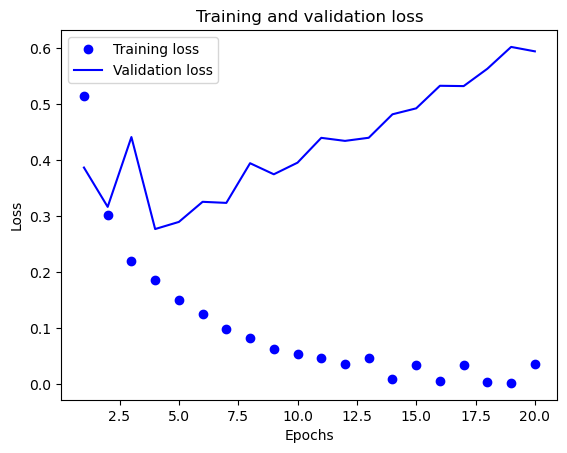

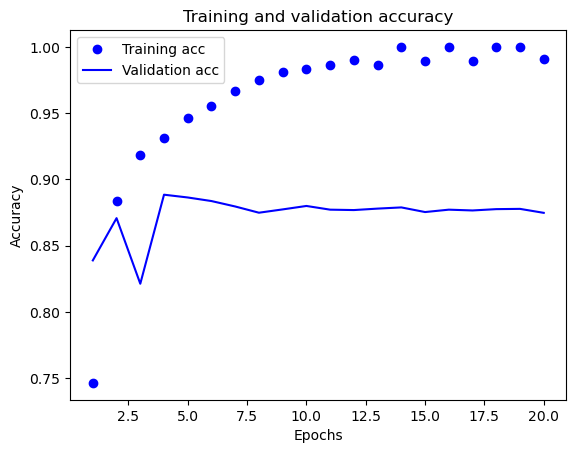

In [124]:
loss_val64 = hist_dict_64_647["loss"]
val_loss_val64 = hist_dict_64_647["val_loss"]
epochs_64 = range(1, len(loss_val64) + 1)
plot647.plot(epochs_64, loss_val64, "bo", label="Training loss")
plot647.plot(epochs_64, val_loss_val64, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc64 = hist_dict_64_647["accuracy"]
val_acc64 = hist_dict_64_647["val_accuracy"]
plot647.plot(epochs_64, acc64, "bo", label="Training acc")
plot647.plot(epochs_64, val_acc64, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [126]:
hist_64_647 = model64_units_647.fit(a_train, b_train, epochs=3, batch_size=512)
results64_units_647 = model64_units_647.evaluate(a_test, b_test)
results64_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9473 - loss: 0.1998
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9716 - loss: 0.0955
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9848 - loss: 0.0567
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8691 - loss: 0.3971


[0.39361393451690674, 0.8723599910736084]

In [128]:
model64_units_647.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.00821231],
       [1.        ],
       [0.91722167],
       ...,
       [0.0345158 ],
       [0.00881196],
       [0.8908644 ]], dtype=float32)

In [132]:
model128units_647 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model128units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
a_val_128_647 = a_train[:10000]
partial_a_train_647 = a_train[10000:]

b_val_128_647 = b_train[:10000]
partial_b_train_647 = b_train[10000:]

hist_128_3 = model128units_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_128_647, b_val_128_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.6720 - loss: 0.6198 - val_accuracy: 0.8023 - val_loss: 0.4306
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8697 - loss: 0.3243 - val_accuracy: 0.8386 - val_loss: 0.3728
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9120 - loss: 0.2243 - val_accuracy: 0.8884 - val_loss: 0.2733
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9332 - loss: 0.1731 - val_accuracy: 0.8848 - val_loss: 0.2839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9611 - loss: 0.1181 - val_accuracy: 0.8384 - val_loss: 0.4680
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9637 - loss: 0.0972 - val_accuracy: 0.8838 - val_loss: 0.3590
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9692 - loss: 0.0815 - val_accuracy: 0.8793 - val_loss: 0.3107
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9920 - loss: 0.0368 - val_accuracy: 0.8806 - 

In [134]:
hist_dict_128_3 = hist_128_3.history
hist_dict_128_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

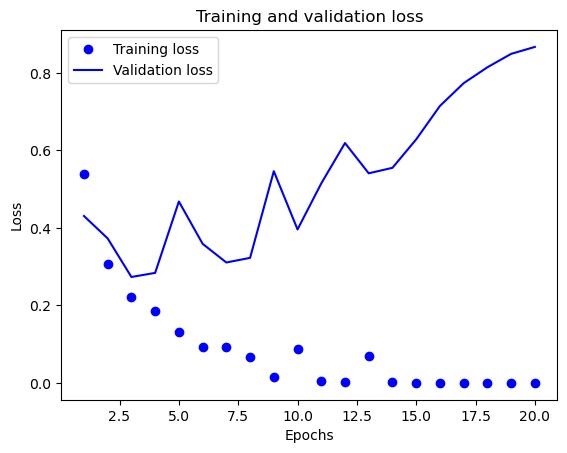

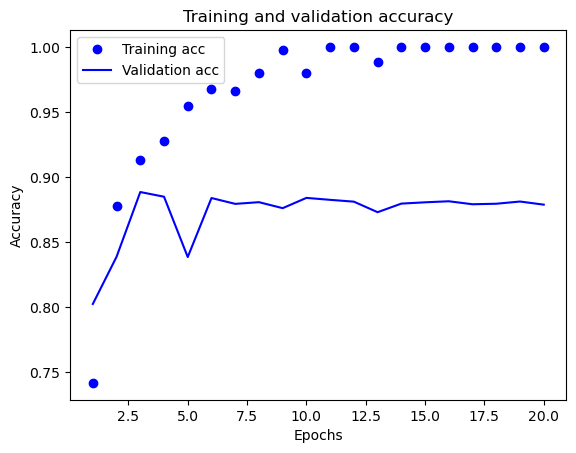

In [136]:
loss_val128_3 = hist_dict_128_3["loss"]
val_loss_val128_3 = hist_dict_128_3["val_loss"]
epochs_128 = range(1, len(loss_val128_3) + 1)
plot647.plot(epochs_128, loss_val128_3, "bo", label="Training loss")
plot647.plot(epochs_128, val_loss_val128_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc128 = hist_dict_128_3["accuracy"]
val_acc128 = hist_dict_128_3["val_accuracy"]
plot647.plot(epochs_128, acc128, "bo", label="Training acc")
plot647.plot(epochs_128, val_acc128, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [138]:
hist_128_3 = model128units_647.fit(a_train, b_train, epochs=2, batch_size=512)
results128_units_3 = model128units_647.evaluate(a_test, b_test)
results128_units_3

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9325 - loss: 0.3001
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9691 - loss: 0.0943
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3861


[0.38981738686561584, 0.8738399744033813]

In [140]:
model128units_647.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.0140983 ],
       [0.9999975 ],
       [0.88741875],
       ...,
       [0.05286739],
       [0.0076533 ],
       [0.89990306]], dtype=float32)

**A 16-unit, 3-layer MSE loss function model**

In [143]:
MSEmodel_16_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSEmodel_16_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
a_val_MSE_16 = a_train[:10000]
partial_a_train_16 = a_train[10000:]

b_val_MSE_16 = b_train[:10000]
partial_b_train_16 = b_train[10000:]
# Model Fit

hist_MSE_647 = MSEmodel_16_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_MSE_16, b_val_MSE_16))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6809 - loss: 0.2160 - val_accuracy: 0.8355 - val_loss: 0.1388
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8737 - loss: 0.1141 - val_accuracy: 0.8808 - val_loss: 0.0971
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9221 - loss: 0.0739 - val_accuracy: 0.8666 - val_loss: 0.0987
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9323 - loss: 0.0611 - val_accuracy: 0.8794 - val_loss: 0.0882
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9461 - loss: 0.0509 - val_accuracy: 0.8762 - val_loss: 0.0911
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9536 - loss: 0.0423 - val_accuracy: 0.8802 - val_loss: 0.0893
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9624 - loss: 0.0361 - val_accuracy: 0.8838 - val_loss: 0.0842
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9720 - loss: 0.0295 - val_accuracy: 0.8809 - v

In [145]:
histdict_MSE_647 = hist_MSE_647.history
histdict_MSE_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

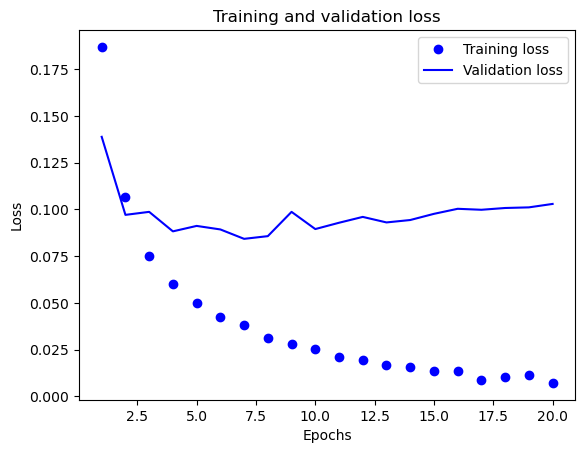

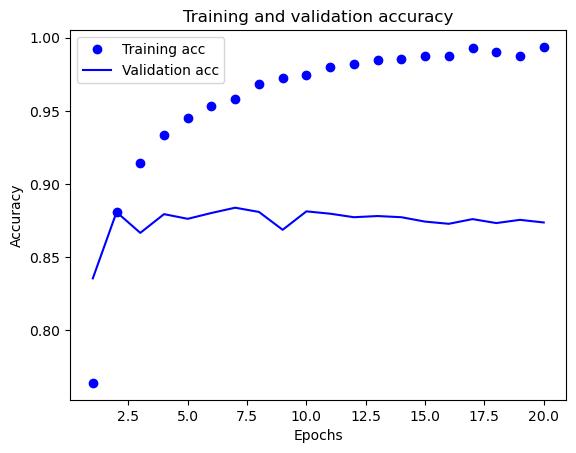

In [147]:
import matplotlib.pyplot as plot647
loss_val_MSE16_3 = histdict_MSE_647["loss"]
val_loss_val_MSE16_3 = histdict_MSE_647["val_loss"]
epochs_MSE = range(1, len(loss_val_MSE16_3) + 1)
plot647.plot(epochs_MSE, loss_val_MSE16_3, "bo", label="Training loss")
plot647.plot(epochs_MSE, val_loss_val_MSE16_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_MSE = histdict_MSE_647["accuracy"]
val_acc_MSE = histdict_MSE_647["val_accuracy"]
plot647.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plot647.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [149]:
MSEmodel_16_647.fit(a_train, b_train, epochs=8, batch_size=512)
resultsMSE_647 = MSEmodel_16_647.evaluate(a_test, b_test)
resultsMSE_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9413 - loss: 0.0483
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9627 - loss: 0.0329
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.0285
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9720 - loss: 0.0259
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9787 - loss: 0.0211
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9831 - loss: 0.0171
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9824 - loss: 0.0179
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9825 - loss: 0.0177
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8648 - loss: 0.1131


[0.11094116419553757, 0.8674799799919128]

In [151]:
MSEmodel_16_647.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01441798],
       [0.9999976 ],
       [0.9933346 ],
       ...,
       [0.07597922],
       [0.00354599],
       [0.32814375]], dtype=float32)

In [153]:
tanh_647 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh_647.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

a_val_tanh = a_train[:10000]
partial_a_train = a_train[10000:]

b_val_tanh = b_train[:10000]
partial_b_train = b_train[10000:]


histtanh_model = tanh_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val_tanh, b_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7034 - loss: 0.2009 - val_accuracy: 0.8598 - val_loss: 0.1319
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8876 - loss: 0.1142 - val_accuracy: 0.8765 - val_loss: 0.1074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9132 - loss: 0.0862 - val_accuracy: 0.8832 - val_loss: 0.0958
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9269 - loss: 0.0722 - val_accuracy: 0.8871 - val_loss: 0.0894
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9355 - loss: 0.0630 - val_accuracy: 0.8853 - val_loss: 0.0872
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9398 - loss: 0.0576 - val_accuracy: 0.8835 - val_loss: 0.0866
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9464 - loss: 0.0521 - val_accuracy: 0.8776 - val_loss: 0.0910
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9496 - loss: 0.0477 - val_accuracy: 0.8849 - v

In [155]:
histdict_tanh_647 = histtanh_model.history
histdict_tanh_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

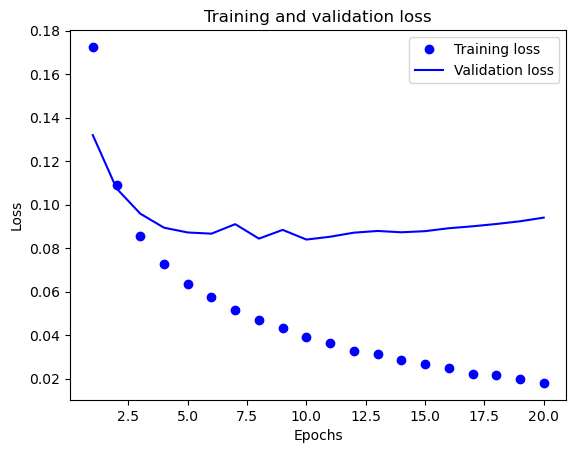

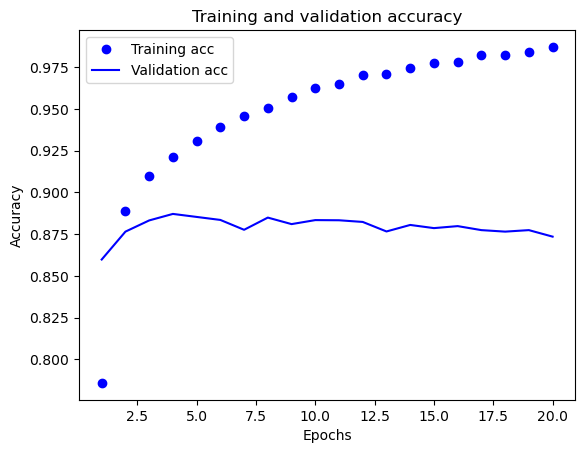

In [157]:
loss_val_tanh_647= histdict_tanh_647["loss"]
val_loss_val_tanh_647 = histdict_tanh_647["val_loss"]
epochs_tanh = range(1, len(loss_val_tanh_647) + 1)
plot647.plot(epochs_tanh, loss_val_tanh_647, "bo", label="Training loss")
plot647.plot(epochs_tanh, val_loss_val_tanh_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_tanh = histdict_tanh_647["accuracy"]
val_acc_tanh = histdict_tanh_647["val_accuracy"]
plot647.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plot647.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [159]:
tanh_647.fit(a_train, b_train, epochs=8, batch_size=512)
resultstanh_647 = tanh_647.evaluate(a_test, b_test)
resultstanh_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9422 - loss: 0.0479
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9545 - loss: 0.0407
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9605 - loss: 0.0363
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9631 - loss: 0.0342
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9696 - loss: 0.0299
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.0291
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9753 - loss: 0.0256
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9755 - loss: 0.0245
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8614 - loss: 0.1109


[0.10940679907798767, 0.8631200194358826]

**Operator Adam, 16 units, 3 levels**

In [162]:
adam_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam_647.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

a_adam_647 = a_train[:10000]
partial_a_train_16 = a_train[10000:]

b_adam_647 = b_train[:10000]
partial_b_train_16 = b_train[10000:]


histadam_647 = adam_647.fit(partial_a_train_16,
                    partial_b_train_16,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_adam_647, b_adam_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.5680 - loss: 0.6797 - val_accuracy: 0.7793 - val_loss: 0.5649
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8378 - loss: 0.5028 - val_accuracy: 0.8785 - val_loss: 0.3874
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9182 - loss: 0.3050 - val_accuracy: 0.8889 - val_loss: 0.2925
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9521 - loss: 0.1766 - val_accuracy: 0.8870 - val_loss: 0.2837
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9694 - loss: 0.1216 - val_accuracy: 0.8835 - val_loss: 0.3031
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9825 - loss: 0.0813 - val_accuracy: 0.8809 - val_loss: 0.3512
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9901 - loss: 0.0539 - val_accuracy: 0.8763 - val_loss: 0.3883
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9954 - loss: 0.0365 - val_accuracy: 0.8753 - v

In [164]:
histdict_adam_647 = histadam_647.history
histdict_adam_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

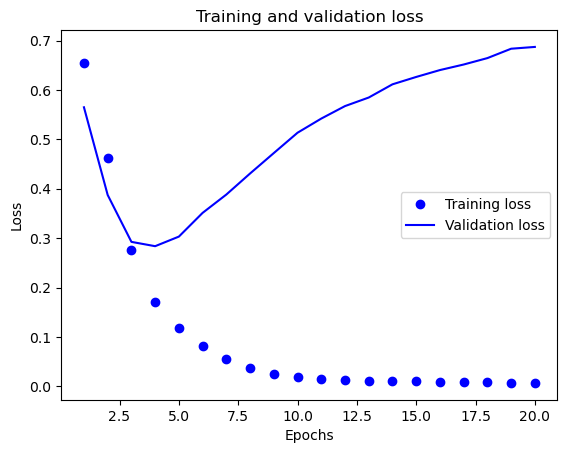

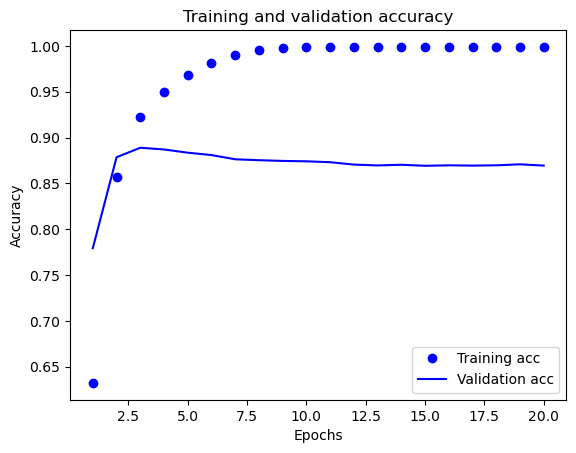

In [166]:
loss_val_adam_647 = histdict_adam_647["loss"]
val_loss_val_adam_647 = histdict_adam_647["val_loss"]
epochs_adam = range(1, len(loss_val_adam_647) + 1)
plot647.plot(epochs_adam, loss_val_adam_647, "bo", label="Training loss")
plot647.plot(epochs_adam, val_loss_val_adam_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_adam = histdict_adam_647["accuracy"]
val_acc_adam = histdict_adam_647["val_accuracy"]
plot647.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plot647.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [168]:
adam_647.fit(a_train, b_train, epochs=4, batch_size=512)
resultsadam = adam_647.evaluate(a_test, b_test)
resultsadam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9379 - loss: 0.2682
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.0988
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.0562
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9941 - loss: 0.0340
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8563 - loss: 0.5366


[0.5297152996063232, 0.8592399954795837]

**Regularization model with 16 units and 2-layers**

In [171]:
from tensorflow.keras import regularizers
regularization_647 = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist_regularization647 = regularization_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))
histdict_regularization647 = hist_regularization647.history
histdict_regularization647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6754 - loss: 0.6523 - val_accuracy: 0.8641 - val_loss: 0.4499
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8948 - loss: 0.3900 - val_accuracy: 0.8836 - val_loss: 0.3637
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9167 - loss: 0.3086 - val_accuracy: 0.8852 - val_loss: 0.3450
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9344 - loss: 0.2558 - val_accuracy: 0.8798 - val_loss: 0.3480
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9471 - loss: 0.2251 - val_accuracy: 0.8870 - val_loss: 0.3290
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9537 - loss: 0.2038 - val_accuracy: 0.8769 - val_loss: 0.3581
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9590 - loss: 0.1939 - val_accuracy: 0.8843 - val_loss: 0.3406
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9634 - loss: 0.1821 - val_accuracy: 0.8776 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

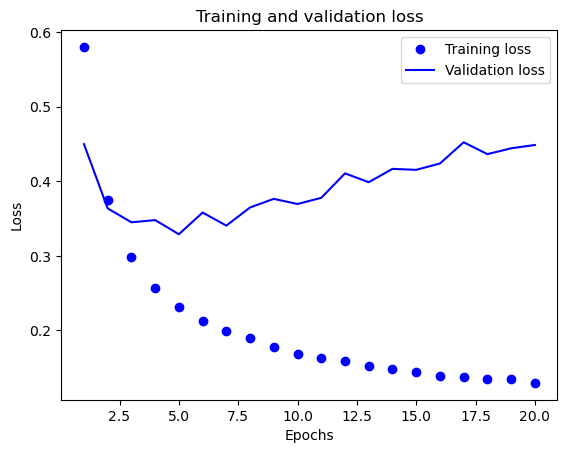

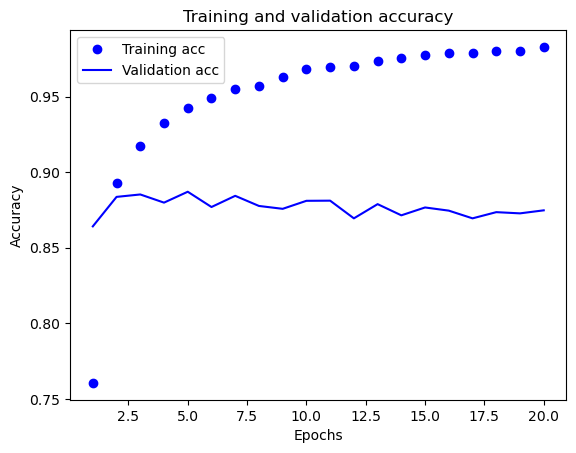

In [173]:
loss_val_647 = histdict_regularization647["loss"]
val_loss_val_reg_647 = histdict_regularization647["val_loss"]
epochs_r = range(1, len(loss_val_647) + 1)
plot647.plot(epochs_r, loss_val_647, "bo", label="Training loss")
plot647.plot(epochs_r, val_loss_val_reg_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_reg = histdict_regularization647["accuracy"]
val_acc_reg = histdict_regularization647["val_accuracy"]
plot647.plot(epochs_r, acc_reg, "bo", label="Training acc")
plot647.plot(epochs_r, val_acc_reg, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [175]:
regularization_647.fit(a_train, b_train, epochs=8, batch_size=512)
resultsregularization_647 = regularization_647.evaluate(a_test, b_test)
resultsregularization_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9409 - loss: 0.2492
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9529 - loss: 0.2000
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9590 - loss: 0.1823
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9614 - loss: 0.1769
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9662 - loss: 0.1641
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9659 - loss: 0.1639
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9700 - loss: 0.1571
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.1601
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.4502


[0.4479433298110962, 0.8660799860954285]

**Dropout feature with 3 levels and 16 units**

In [182]:
from tensorflow.keras import regularizers
Dropout_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist_Dropout_647 = Dropout_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))
histdict_Dropout_647 = hist_Dropout_647.history
histdict_Dropout_647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5345 - loss: 0.6841 - val_accuracy: 0.7984 - val_loss: 0.6132
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6677 - loss: 0.6175 - val_accuracy: 0.8561 - val_loss: 0.5049
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7419 - loss: 0.5417 - val_accuracy: 0.8626 - val_loss: 0.4297
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7965 - loss: 0.4790 - val_accuracy: 0.8809 - val_loss: 0.3537
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8388 - loss: 0.4214 - val_accuracy: 0.8866 - val_loss: 0.3221
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8754 - loss: 0.3577 - val_accuracy: 0.8891 - val_loss: 0.3045
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8909 - loss: 0.3253 - val_accuracy: 0.8894 - val_loss: 0.2851
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9101 - loss: 0.2851 - val_accuracy: 0.8841 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

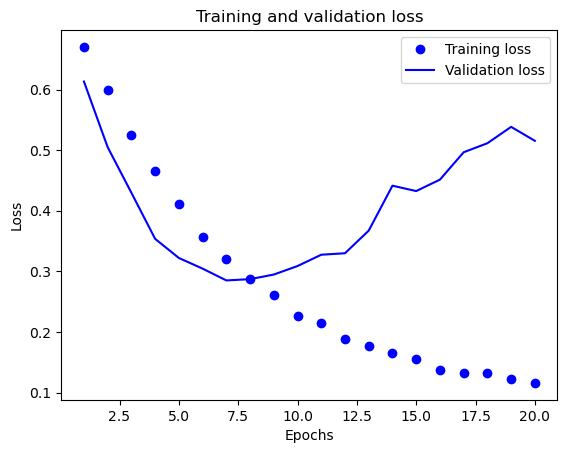

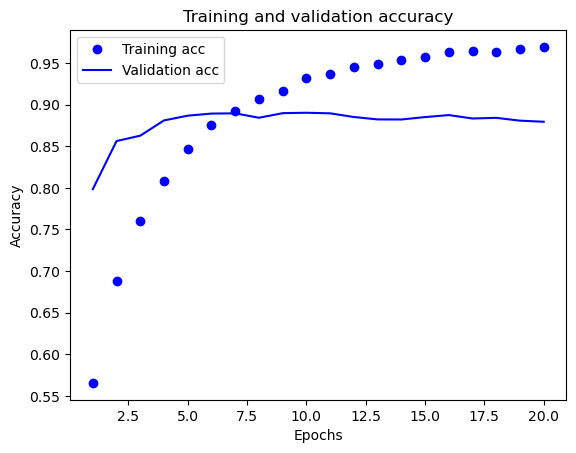

In [184]:
loss_val_647 = histdict_Dropout_647["loss"]
val_loss_val_drp_647 = histdict_Dropout_647["val_loss"]
epochs_d = range(1, len(loss_val_647) + 1)
plot647.plot(epochs_d, loss_val_647, "bo", label="Training loss")
plot647.plot(epochs_d, val_loss_val_drp_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_drp = histdict_Dropout_647["accuracy"]
val_acc_drp = histdict_Dropout_647["val_accuracy"]
plot647.plot(epochs_d, acc_drp, "bo", label="Training acc")
plot647.plot(epochs_d, val_acc_drp, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [186]:
Dropout_647.fit(a_train, b_train, epochs=8, batch_size=512)
resultsDropout647 = Dropout_647.evaluate(a_test, b_test)
resultsDropout647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9159 - loss: 0.3071
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9317 - loss: 0.2429
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9340 - loss: 0.2225
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9397 - loss: 0.2034
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9442 - loss: 0.1861
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9453 - loss: 0.1815
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9475 - loss: 0.1752
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9494 - loss: 0.1654
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8661 - loss: 0.5499


[0.5547828674316406, 0.8669599890708923]

**32-unit, 3-layer training model with hyper-tuned parameters**

In [189]:
from tensorflow.keras import regularizers
Hyper_647 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

hist_Hyper647 = Hyper_647.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))
hist_dictHyper647 = hist_Hyper647.history
hist_dictHyper647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5512 - loss: 0.2544 - val_accuracy: 0.8369 - val_loss: 0.1894
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7356 - loss: 0.1977 - val_accuracy: 0.8620 - val_loss: 0.1363
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8101 - loss: 0.1574 - val_accuracy: 0.8766 - val_loss: 0.1103
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8549 - loss: 0.1310 - val_accuracy: 0.8727 - val_loss: 0.1044
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8847 - loss: 0.1089 - val_accuracy: 0.8846 - val_loss: 0.0984
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9040 - loss: 0.0924 - val_accuracy: 0.8785 - val_loss: 0.1019
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9159 - loss: 0.0827 - val_accuracy: 0.8852 - val_loss: 0.1025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9328 - loss: 0.0730 - val_accuracy: 0.8765 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

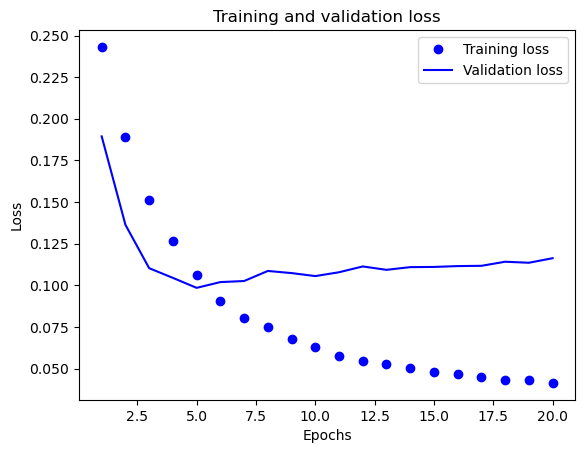

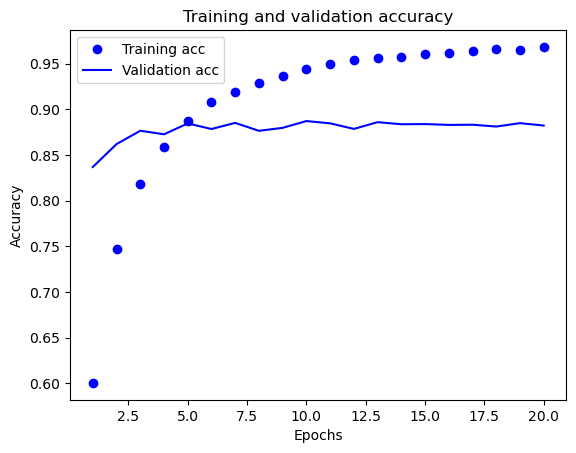

In [191]:
loss_val_hyp_647 = hist_dictHyper647["loss"]
val_loss_val_hyp_647 = hist_dictHyper647["val_loss"]
epochs_h = range(1, len(loss_val_hyp_647) + 1)
plot647.plot(epochs_h, loss_val_hyp_647, "bo", label="Training loss")
plot647.plot(epochs_h, val_loss_val_hyp_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_hyp = hist_dictHyper647["accuracy"]
val_acc_hyp = hist_dictHyper647["val_accuracy"]
plot647.plot(epochs_h, acc_hyp, "bo", label="Training acc")
plot647.plot(epochs_h, val_acc_hyp, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [193]:
Hyper_647.fit(a_train, b_train, epochs=8, batch_size=512)
resultsHyper647 = Hyper_647.evaluate(a_test, b_test)
resultsHyper647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9276 - loss: 0.0739
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9307 - loss: 0.0701
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9411 - loss: 0.0623
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9433 - loss: 0.0589
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9456 - loss: 0.0573
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9494 - loss: 0.0536
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9479 - loss: 0.0560
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9536 - loss: 0.0509
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8706 - loss: 0.1204


[0.11948593705892563, 0.8721200227737427]

**To illustrate the accuracy vs. loss for various models, make a scatter plot, label each point with the model's name, and add labels to the axes and plot title.**

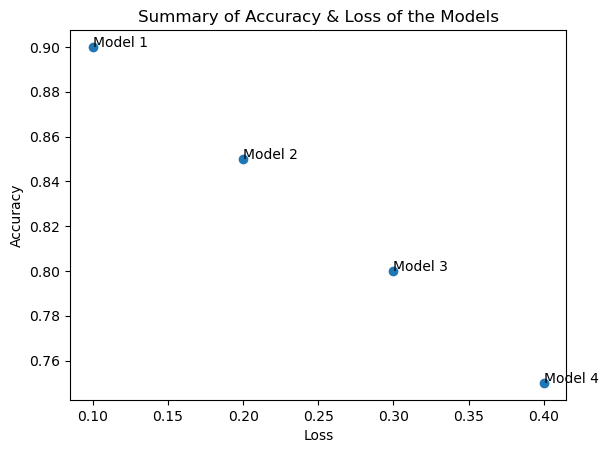

In [196]:
Mod_Loss = [0.1, 0.2, 0.3, 0.4]  # Example loss values
Mod_Accuracy = [0.9, 0.85, 0.8, 0.75]  # Example accuracy values
Labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']  # Labels for each point

fig, axis = plot647.subplots()
axis.scatter(Mod_Loss, Mod_Accuracy)
for i, txt in enumerate(Labels):
    axis.annotate(txt, (Mod_Loss[i], Mod_Accuracy[i]))
plot647.title("Summary of Accuracy & Loss of the Models")
plot647.ylabel("Accuracy")
plot647.xlabel("Loss")

plot647.show()

**Description**

A simple neural network with a single 16-unit hidden layer had to be constructed using binary cross entropy and relu activation once data had been imported and analytic settings reviewed. To improve the model's performance, more research was conducted. This required changing the units per layer (32, 64, and 128) as well as the amount of hidden levels (one to three). Although increasing the number of concealed units usually enhanced accuracy, overfitting was a risk. Furthermore, the model's performance remained mostly unchanged when mean squared error (MSE) loss was substituted for binary cross entropy. All things considered, the results indicated that while changing the parameters and design would improve accuracy, picking the right loss functions and avoiding overfitting required substantial thought.